# 📌 Project Title: *ChatGPT Review Sentiment Analysis*

---

## 🧠 Project Overview
Sentiment analysis is a **Natural Language Processing (NLP)** technique used to determine the sentiment expressed in a given text.

This project aims to analyze user reviews of a **ChatGPT application** and classify them as **positive**, **neutral**, or **negative** based on the sentiment expressed.

The primary goal is to:
- Gain insights into customer satisfaction  
- Identify common concerns  
- Enhance the application's user experience

---

## 💼 Business Use Cases

### ✅ Customer Feedback Analysis
Understand user opinions and sentiments to improve product features and usability.

### ✅ Brand Reputation Management
Monitor and track sentiment trends over time to evaluate the brand’s overall perception among users.

### ✅ Feature Enhancement
Identify areas for improvement by analyzing **neutral** and **negative** reviews for recurring issues.

### ✅ Automated Customer Support
Automatically prioritize and categorize customer complaints using sentiment classification, enabling faster support response.

### ✅ Marketing Strategy Optimization
Use sentiment-driven insights to tailor marketing and engagement strategies, boosting user satisfaction and retention.

# 📌 2. Importing the Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 📌 3. Loading the Dataset

In [2]:
df=pd.read_csv(r"E:\AI Echo Your Smartest Conversational Partner\chatgpt_reviews_dataset.csv")

# 📌 4. Data Preprocessing and Cleaning

In [3]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [4]:
df.tail()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
9995,6/13/2024,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No
9996,7/16/2024,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes
9997,7/22/2024,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes
9998,5/24/2024,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes
9999,2/17/2025,Fantastic Experience,Resource plant behind vote its try laugh. Othe...,2,brownadrienne,61,81,Web,en,Germany,3.5,Yes


In [5]:
df.shape

(10000, 12)

In [6]:
df.isna()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [8]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [9]:
df.dtypes

date                  object
title                 object
review                object
rating                 int64
username              object
helpful_votes          int64
review_length          int64
platform              object
language              object
location              object
version              float64
verified_purchase     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [11]:
df.describe()

,rating,helpful_votes,review_length,version
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.987000,50.347800,147.034000,3.651070
std,1.424161,28.914613,34.911708,0.438935
min,1.000000,0.000000,30.000000,3.000000
25%,2.000000,25.000000,122.000000,3.500000
50%,3.000000,50.000000,151.000000,4.000000
75%,4.000000,75.000000,176.000000,4.100000
max,5.000000,100.000000,199.000000,4.100000


In [12]:
df['rating'].value_counts().sort_index()

rating
1    2062
2    2007
3    1943
4    1975
5    2013
Name: count, dtype: int64

In [13]:
df['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

rating
1    20.62
2    20.07
3    19.43
4    19.75
5    20.13
Name: proportion, dtype: float64

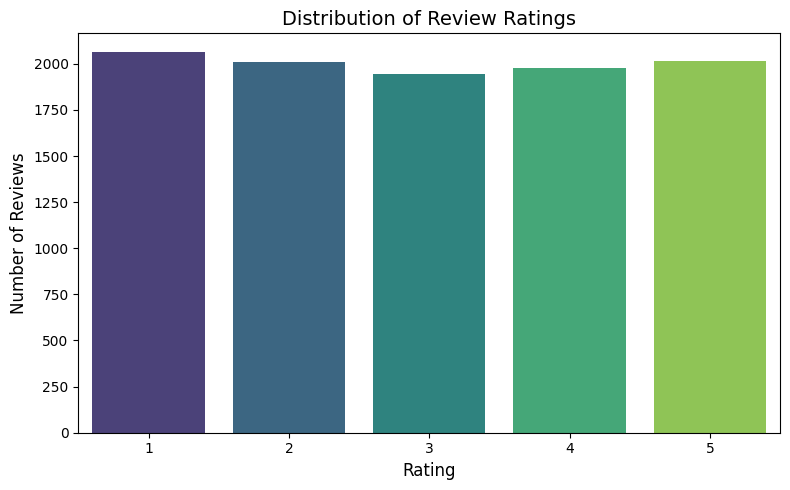

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Review Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [15]:
#Combine Review Time and Review
df['complete_review'] = df['title'] +' .'+df['review']

In [16]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title','username']
df= df.drop(remove_cols,axis='columns')

In [17]:
df.head()

,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,complete_review
0,2,68,78,Mobile,es,Canada,3.0,No,Impressive .Mother former community upon vote ...
1,5,71,193,Web,de,India,4.1,Yes,Waste of Time .General paper understand main. ...
2,4,66,184,Web,hi,India,4.1,Yes,Waste of Time .Here situation his high stage. ...
3,1,5,193,Web,fr,Canada,4.0,Yes,Not Accurate .Rule court behind growth reality...
4,3,71,131,Web,hi,Australia,4.1,No,Fantastic Experience .Case opportunity season ...


# 📌 5. Exploratory Data Analysis

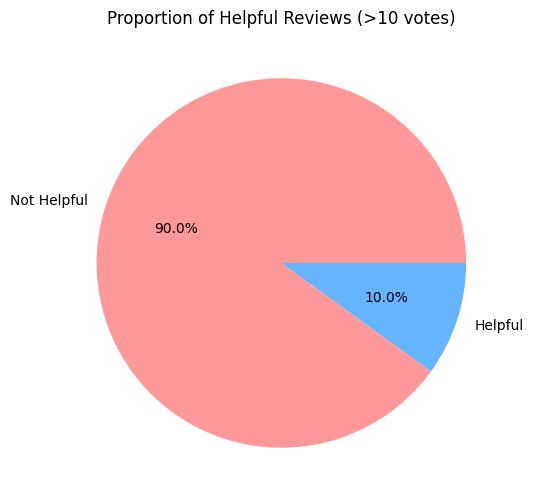

In [18]:
df['helpful'] = df['helpful_votes'] > 10
helpful_counts = df['helpful'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(helpful_counts, labels=['Not Helpful', 'Helpful'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Helpful Reviews (>10 votes)')
plt.show()

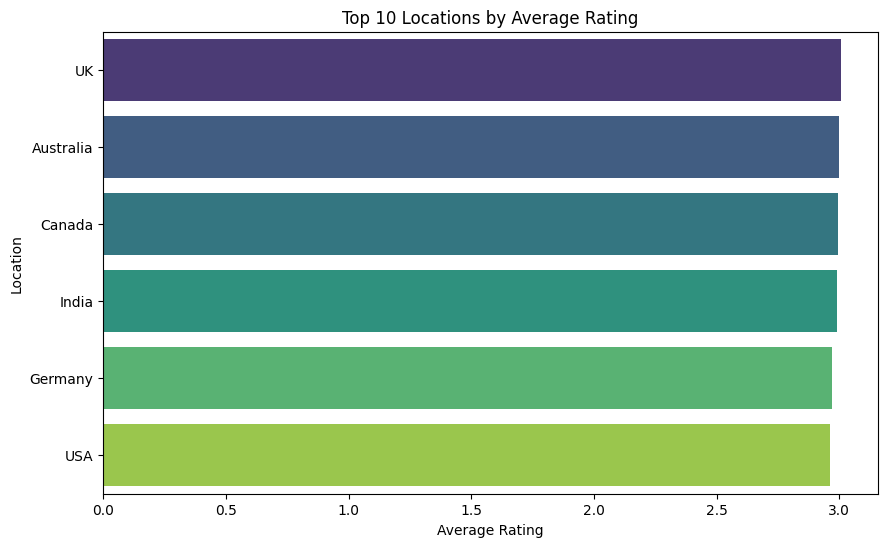

In [19]:
location_rating = df.groupby('location')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=location_rating.values, y=location_rating.index, palette='viridis')
plt.title('Top 10 Locations by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()

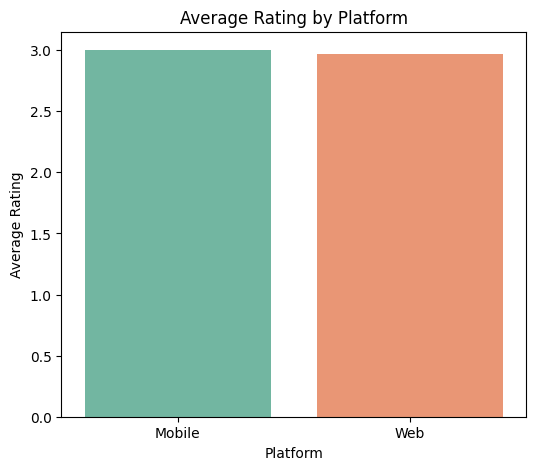

In [20]:
platform_rating = df.groupby('platform')['rating'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='platform', y='rating', data=platform_rating, palette='Set2')
plt.title('Average Rating by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Rating')
plt.show()

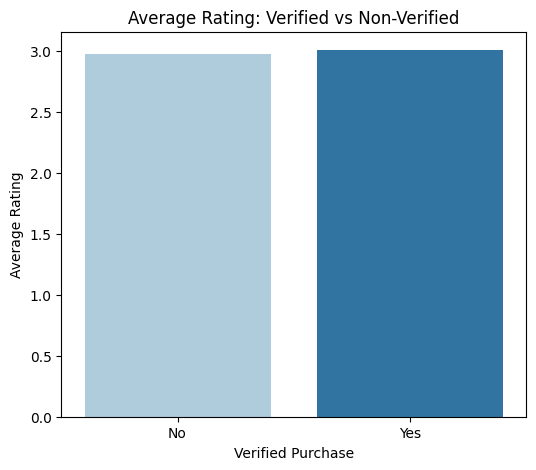

In [21]:
verified_sentiment = df.groupby('verified_purchase')['rating'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='verified_purchase', y='rating', data=verified_sentiment, palette='Paired')
plt.title('Average Rating: Verified vs Non-Verified')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.show()

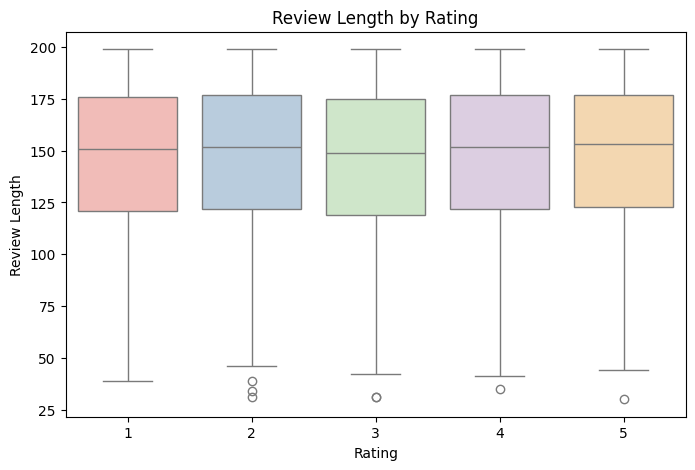

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='rating', y='review_length', data=df, palette='Pastel1')
plt.title('Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

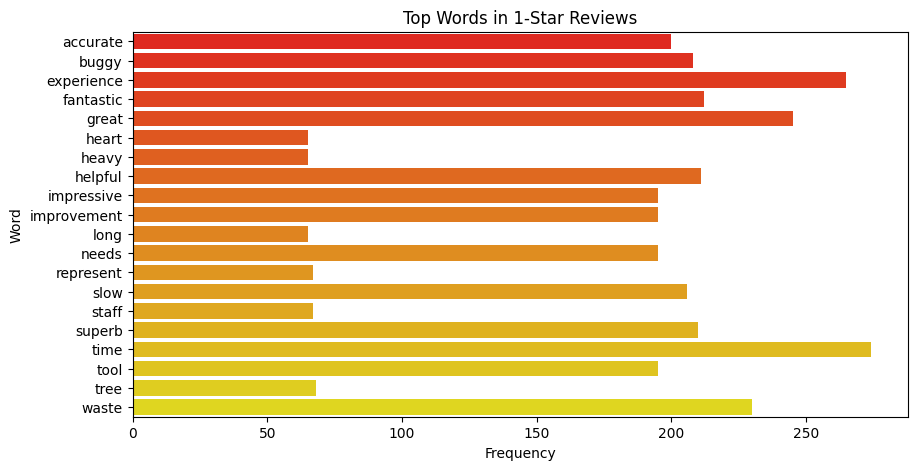

In [23]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

one_star_reviews = df[df['rating'] == 1]['complete_review'].dropna().astype(str)
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(one_star_reviews)
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

plt.figure(figsize=(10, 5))
sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette='autumn')
plt.title('Top Words in 1-Star Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

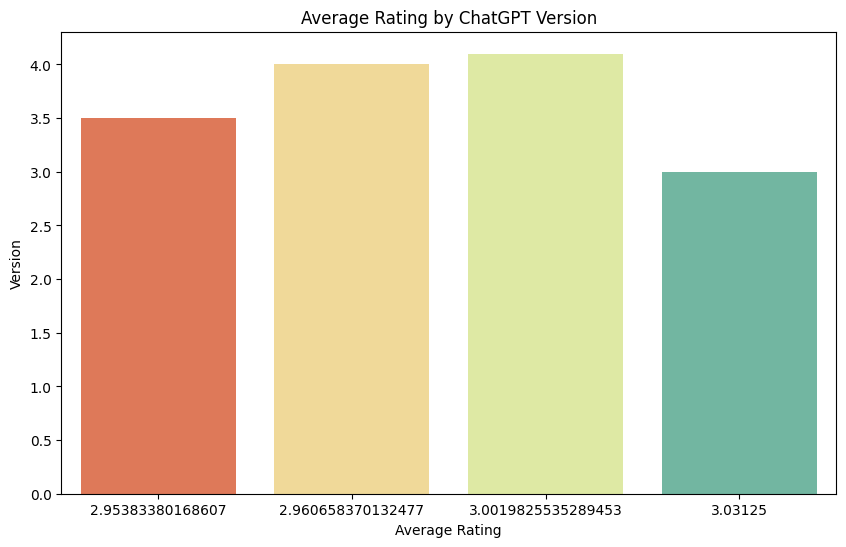

In [24]:
version_rating = df.groupby('version')['rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='version', data=version_rating, palette='Spectral')
plt.title('Average Rating by ChatGPT Version')
plt.xlabel('Average Rating')
plt.ylabel('Version')
plt.show()

# 📌 6. Text Preprocessing and Cleaning for Modelling with NLP Techniques

In [25]:
# NLP and text preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a8023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a8023\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag, WordNetLemmatizer
from nltk.corpus import wordnet as wn
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to get WordNet POS from NLTK POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ  # Adjective
    elif tag.startswith('V'):
        return wn.VERB  # Verb
    elif tag.startswith('N'):
        return wn.NOUN  # Noun
    elif tag.startswith('R'):
        return wn.ADV  # Adverb
    else:
        return wn.NOUN  # Default to noun if no match

# Optimized cleaning function with lemmatization and stopword removal
def clean_text(text):
    """
    Perform text cleaning and preprocessing:
    - Remove URLs, special characters, digits, mentions, hashtags, etc.
    - Tokenize, remove stopwords, and apply lemmatization (with optional POS tagging).
    """
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs, mentions, hashtags, and digits
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions and hashtags
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # Remove punctuation

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization with POS tagging
    tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tag(tokens)]

    # Rejoin tokens to form the cleaned text
    cleaned_text = " ".join(tokens)
    return cleaned_text

# Apply cleaning function to the review column
df['clean_review'] = df['complete_review'].apply(clean_text)

# Show the cleaned text
df[['complete_review', 'clean_review']].head(10)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\a8023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\a8023\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,complete_review,clean_review
0,Impressive .Mother former community upon vote ...,impressive mother former community upon vote f...
1,Waste of Time .General paper understand main. ...,waste time general paper understand main age h...
2,Waste of Time .Here situation his high stage. ...,waste time situation high stage agree certainl...
3,Not Accurate .Rule court behind growth reality...,accurate rule court behind growth reality toni...
4,Fantastic Experience .Case opportunity season ...,fantastic experience case opportunity season r...
5,Not Accurate .Top position able wear its betwe...,accurate top position able wear kid number aut...
6,Very Helpful .Brother individual process alway...,helpful brother individual process always sing...
7,Needs Improvement .Upon bit pick. Seven along ...,need improvement upon bit pick seven along uni...
8,Fantastic Experience .Number choice student pr...,fantastic experience number choice student pro...
9,Not Accurate .Stand space approach southern.\n...,accurate stand space approach southern glass f...


In [27]:
df.head()

,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,complete_review,helpful,clean_review
0,2,68,78,Mobile,es,Canada,3.0,No,Impressive .Mother former community upon vote ...,True,impressive mother former community upon vote f...
1,5,71,193,Web,de,India,4.1,Yes,Waste of Time .General paper understand main. ...,True,waste time general paper understand main age h...
2,4,66,184,Web,hi,India,4.1,Yes,Waste of Time .Here situation his high stage. ...,True,waste time situation high stage agree certainl...
3,1,5,193,Web,fr,Canada,4.0,Yes,Not Accurate .Rule court behind growth reality...,False,accurate rule court behind growth reality toni...
4,3,71,131,Web,hi,Australia,4.1,No,Fantastic Experience .Case opportunity season ...,True,fantastic experience case opportunity season r...


# 📌 7. Make a New Variable Sentiment and analyse with the help of Rating

In [28]:
df['sentiment'] = df['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
df.head(5)

,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,complete_review,helpful,clean_review,sentiment
0,2,68,78,Mobile,es,Canada,3.0,No,Impressive .Mother former community upon vote ...,True,impressive mother former community upon vote f...,0
1,5,71,193,Web,de,India,4.1,Yes,Waste of Time .General paper understand main. ...,True,waste time general paper understand main age h...,2
2,4,66,184,Web,hi,India,4.1,Yes,Waste of Time .Here situation his high stage. ...,True,waste time situation high stage agree certainl...,2
3,1,5,193,Web,fr,Canada,4.0,Yes,Not Accurate .Rule court behind growth reality...,False,accurate rule court behind growth reality toni...,0
4,3,71,131,Web,hi,Australia,4.1,No,Fantastic Experience .Case opportunity season ...,True,fantastic experience case opportunity season r...,1


In [29]:
pd.set_option('display.max_colwidth', None)
df.head()

,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,complete_review,helpful,clean_review,sentiment
0,2,68,78,Mobile,es,Canada,3.0,No,Impressive .Mother former community upon vote fact. Sure stock rich could soldier PM wear.,True,impressive mother former community upon vote fact sure stock rich could soldier pm wear,0
1,5,71,193,Web,de,India,4.1,Yes,Waste of Time .General paper understand main. Or age half wonder positive senior. Book agency professional over alone away sit.\nAfter like law policy than what news. Book moment hour approach kind future ten.,True,waste time general paper understand main age half wonder positive senior book agency professional alone away sit like law policy news book moment hour approach kind future ten,2
2,4,66,184,Web,hi,India,4.1,Yes,Waste of Time .Here situation his high stage. Agree certainly blue thousand sense.\nHelp remember media over as country. Rich box increase place better energy tough nation. Care think huge game value.,True,waste time situation high stage agree certainly blue thousand sense help remember medium country rich box increase place well energy tough nation care think huge game value,2
3,1,5,193,Web,fr,Canada,4.0,Yes,Not Accurate .Rule court behind growth reality. Tonight whose car assume school national. Matter heart television yourself.\nMorning source east simple about woman. Put enough consider candidate imagine show.,False,accurate rule court behind growth reality tonight whose car assume school national matter heart television morning source east simple woman put enough consider candidate imagine show,0
4,3,71,131,Web,hi,Australia,4.1,No,Fantastic Experience .Case opportunity season road write. Effort green worry tonight similar.\nWife last probably light think war. Safe claim whose check.,True,fantastic experience case opportunity season road write effort green worry tonight similar wife last probably light think war safe claim whose check,1


In [30]:
df['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
0    40.69
2    39.88
1    19.43
Name: proportion, dtype: float64

# 📌 8. Analyzing the Review with the help of Wordcloud Showing the Negative, Positive and Neutral Words 

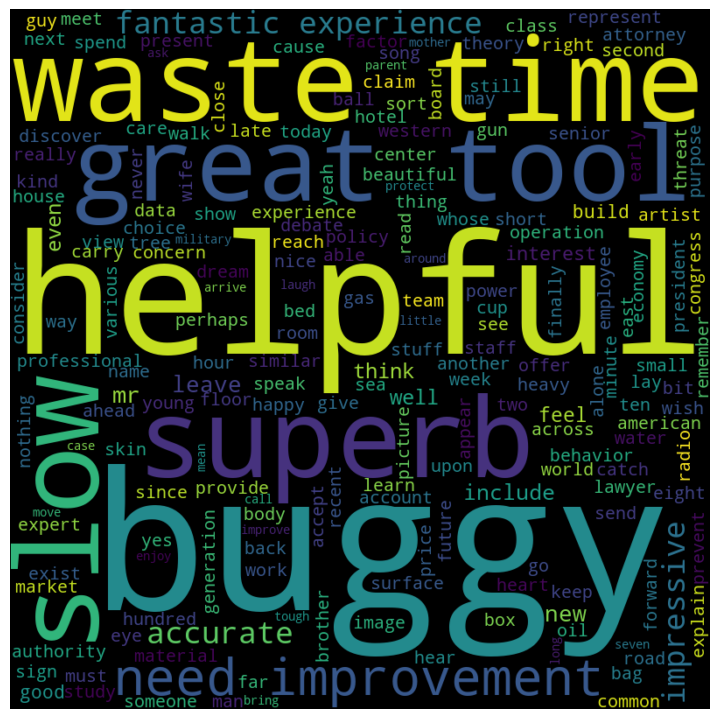

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Assuming you have a 'complete_review' column in your data
stopword = set(stopwords.words('english'))
text = " ".join(review for review in df['clean_review'])

# Generate the WordCloud without mask
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopword,
                      min_font_size=10).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [32]:
#positive negative & neutral sentiment:
positive = df[df['sentiment'] == 2]
negative = df[df['sentiment'] == 0]
neutral = df[df['sentiment'] == 1]

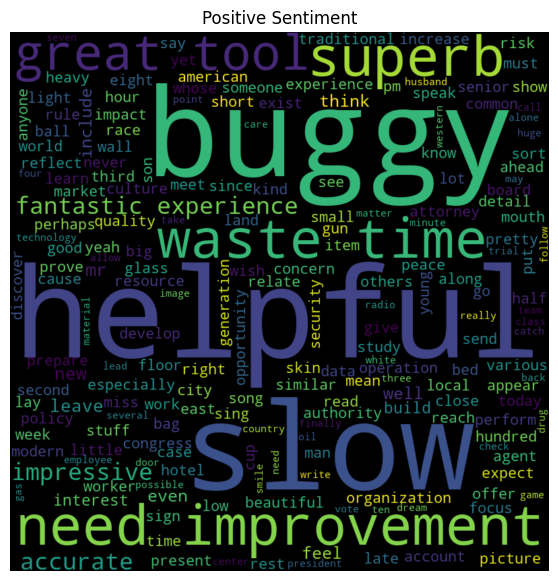

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Positive sentiment WordCloud
stopword = set(stopwords.words('english'))
text_positive = " ".join(review for review in positive['clean_review'])

wordcloud_positive = WordCloud(width=800, height=800,
                               background_color='black',
                               stopwords=stopword,
                               min_font_size=10).generate(text_positive)

# Plot the Positive WordCloud image
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment")
plt.show()


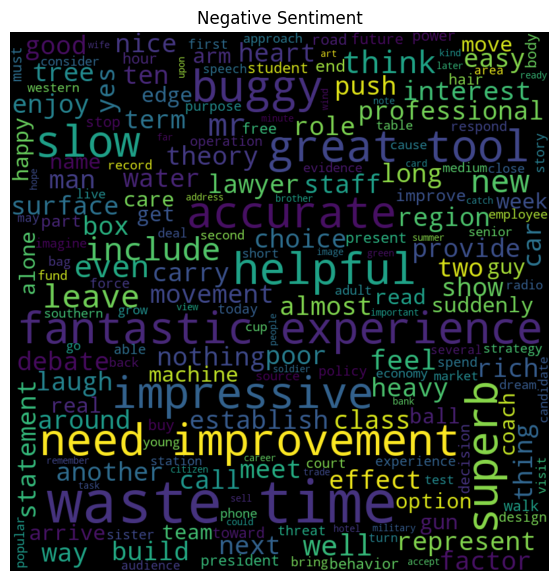

In [34]:
# Negative sentiment WordCloud
text_negative = " ".join(review for review in negative['clean_review'])

wordcloud_negative = WordCloud(width=800, height=800,
                               background_color='black',
                               stopwords=stopword,
                               min_font_size=10).generate(text_negative)

# Plot the Negative WordCloud image
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment")
plt.show()

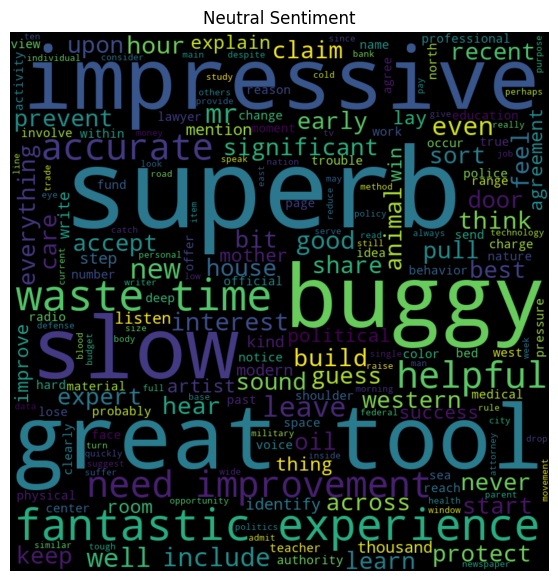

In [35]:
# Neutral sentiment WordCloud
text_neutral = " ".join(review for review in neutral['clean_review'])

wordcloud_neutral = WordCloud(width=800, height=800,
                              background_color='black',
                              stopwords=stopword,
                              min_font_size=10).generate(text_neutral)

# Plot the Neutral WordCloud image
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Sentiment")
plt.show()

# 📌 9. Bag of Word Vectorization using Count Vectorizer

In [36]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(df['clean_review'])
y = df['sentiment']

In [37]:
import joblib

# Assuming 'cv' is your trained CountVectorizer
joblib.dump(cv, 'count_vectorizer.pkl')
print("CountVectorizer saved as 'count_vectorizer.pkl'")

CountVectorizer saved as 'count_vectorizer.pkl'


# 📌 10. Class Imbalance Issue Fix with SMOTE Analysis

In [38]:
# Instantiate the SMOTE object
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# 📌 11. Machine Learning Modelling

In [39]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.2,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9765, 780)
(2442, 780)
(9765,)
(2442,)


In [40]:
# Multinomial Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

Accuracy 0.3988533988533989
              precision    recall  f1-score   support

           0       0.35      0.34      0.35       828
           1       0.52      0.46      0.49       908
           2       0.33      0.38      0.35       706

    accuracy                           0.40      2442
   macro avg       0.40      0.40      0.40      2442
weighted avg       0.41      0.40      0.40      2442



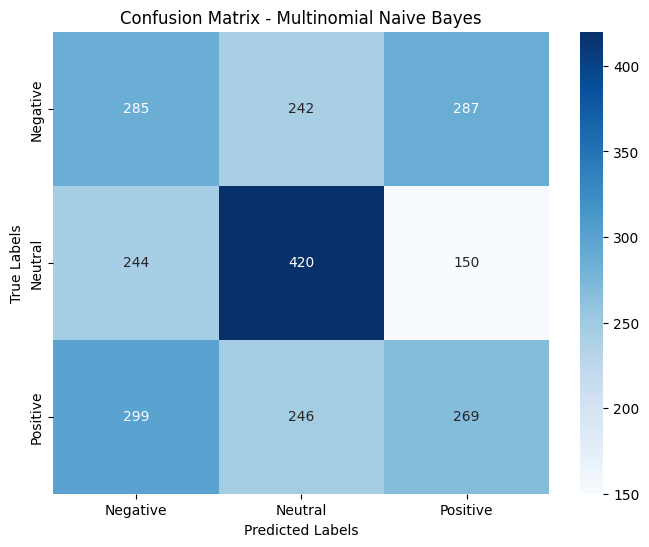

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [42]:
# Initialize and train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

Accuracy: 0.47215397215397215
              precision    recall  f1-score   support

           0       0.40      0.41      0.40       799
           1       0.64      0.60      0.62       861
           2       0.38      0.40      0.39       782

    accuracy                           0.47      2442
   macro avg       0.47      0.47      0.47      2442
weighted avg       0.48      0.47      0.47      2442



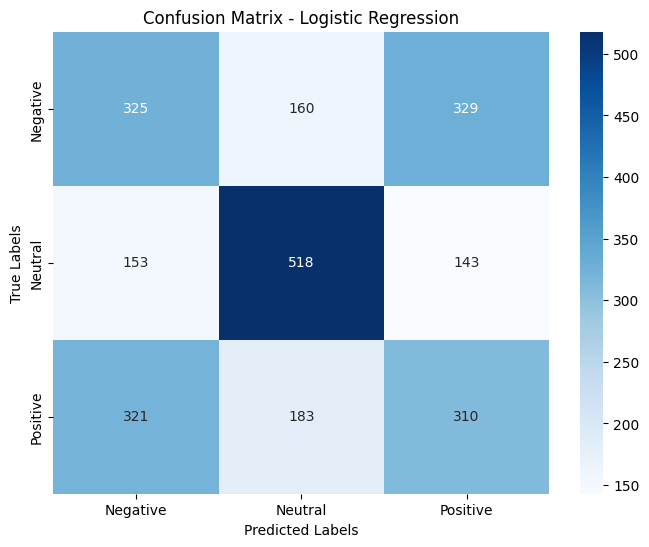

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [44]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_pred, y_test))

Accuracy: 0.5229320229320229
              precision    recall  f1-score   support

           0       0.50      0.43      0.47       953
           1       0.59      0.86      0.70       563
           2       0.47      0.41      0.44       926

    accuracy                           0.52      2442
   macro avg       0.52      0.57      0.54      2442
weighted avg       0.51      0.52      0.51      2442



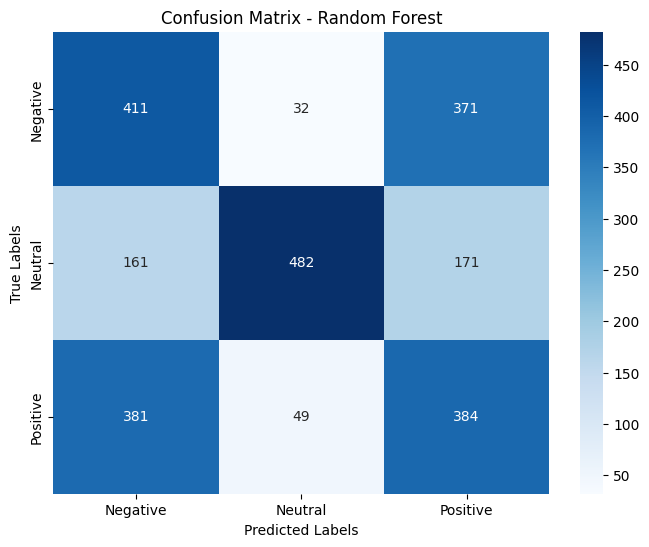

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for Random Forest using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [46]:
# Create DMatrix for training and testing data
# XGBoost Model
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]
print("Accuracy",accuracy_score(y_test, pred_labels))
print(classification_report(pred_labels, y_test))

Accuracy 0.5045045045045045
              precision    recall  f1-score   support

           0       0.50      0.41      0.45       979
           1       0.57      0.83      0.67       552
           2       0.45      0.41      0.43       911

    accuracy                           0.50      2442
   macro avg       0.50      0.55      0.52      2442
weighted avg       0.50      0.50      0.49      2442



In [47]:
# Save the trained model to a file
model.save_model('xgboost_sentiment_model.json')
print("XGBoost model saved as 'xgboost_sentiment_model.json'")

XGBoost model saved as 'xgboost_sentiment_model.json'


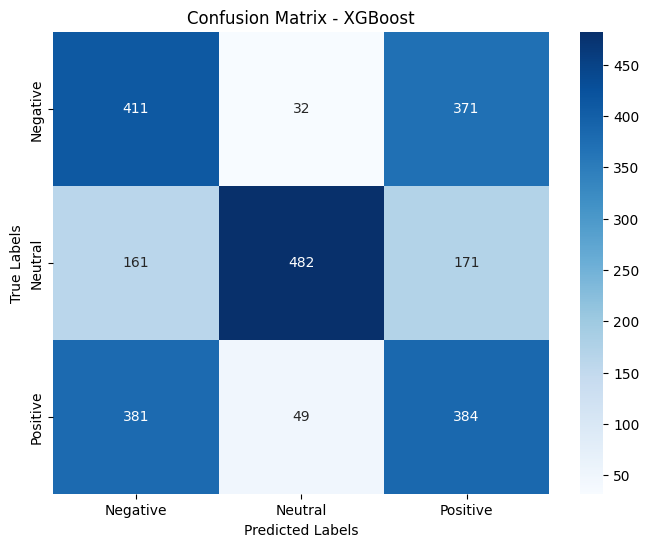

In [48]:
# Compute the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix for XGBoost using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
# Assuming df['sentiment'] has values 0 (Negative), 1 (Neutral), and 2 (Positive)
# NPS Score Calculation for the whole Review Analysis
# Define the sentiment categories based on your sentiment column (0, 1, 2)
df['NPS Category Sentiment'] = df['sentiment'].apply(lambda x: 'Positive' if x == 2 else ('Neutral' if x == 1 else 'Negative'))

# Calculate the percentage of each category based on sentiment
nps_sentiment_counts = df['NPS Category Sentiment'].value_counts(normalize=True) * 100

# Calculate the NPS Score (Positive - Negative), with positive and negative values being percentages
nps_sentiment_score = nps_sentiment_counts.get('Positive', 0) - nps_sentiment_counts.get('Negative', 0)

# Display the NPS Score
print("NPS Sentiment Score:", nps_sentiment_score)

# Also display the sentiment category distribution
print("\nSentiment Category Distribution (in percentage):")
print(nps_sentiment_counts)

NPS Sentiment Score: -0.8100000000000023

Sentiment Category Distribution (in percentage):
NPS Category Sentiment
Negative    40.69
Positive    39.88
Neutral     19.43
Name: proportion, dtype: float64
